### Zomato Data Analysis Project

### Steps: 
### Step1 : - Importing Liraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Step : Create the data frame

In [2]:
dataframe = pd.read_csv('Zomato data .csv')

In [3]:
dataframe


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Step 3: Data Cleaning:
checking for missing values,outliers in the dataset if present then remove them.

In [5]:
#convert the rateing column from x/5 to X only like 4.5/5 -> 4.5
def handelRate(rate):
    if isinstance(rate, str):
        if '/' in rate:
            return float(rate.split('/')[0])
        else:
            try:
                return float(rate)
            except ValueError:
                print(f"Invalid rate value: {rate}")
                return None
    return rate


In [7]:
# function call for handel dataRate to convert the 4.5/5 -> 4.5
dataframe['rate'] = dataframe['rate'].apply(handelRate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [10]:
#checking that is there any missing values in data or not using the info function
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### 1-> Type Of Resturant: 
### Qus1 - Find out the type of resturant where the is High Demad of Food (or maximum order food from here). 

In [11]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Orders')

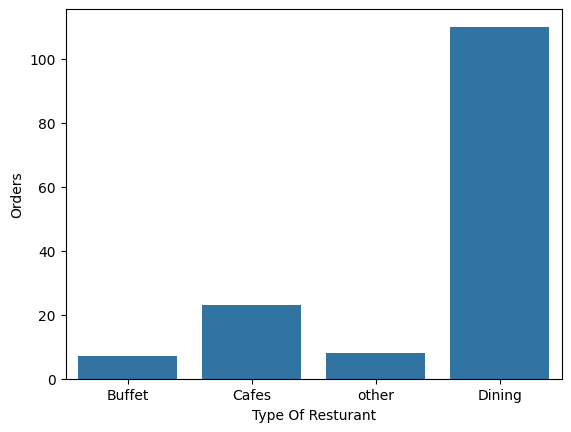

In [17]:
#usng seeborn library to make the graph
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type Of Resturant") # label X-axis
plt.ylabel("Orders") #label y axis

### Conclusion :
majority of the resturants from where customer order the most fall in dining category.

### 2 -> How many votes has each type of restaurant received from customers ?

In [1]:
dataframe.head()

Text(0, 0.5, 'Votes')

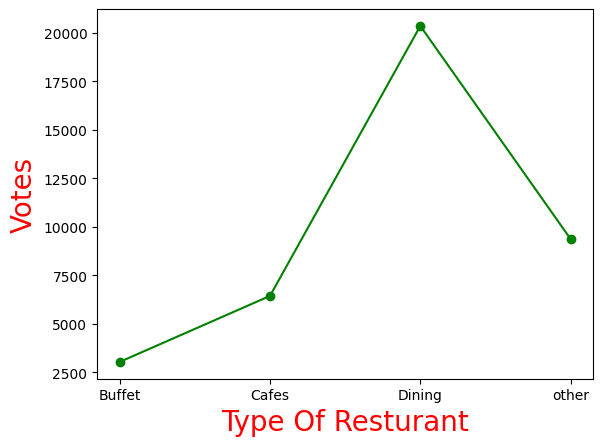

In [23]:
#creating the line graph for showing the type of hotels and the number of votes to them
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o") #line graph plot , markers are the dots present in the graph
plt.xlabel("Type Of Resturant",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

### conclusion: 
Dining restaurants got maximum votes.

### Qus 3-> What are the ratings that the majority of resturants have received ?

In [24]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


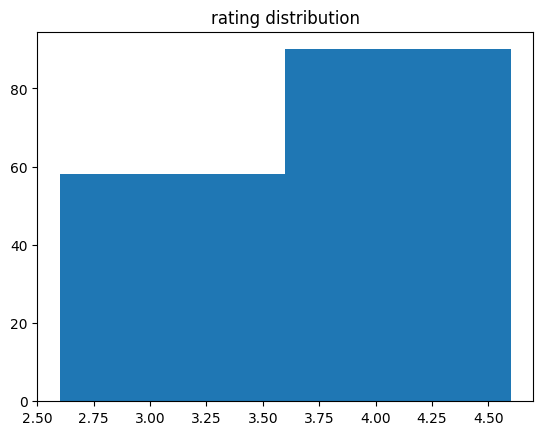

In [31]:
plt.hist(dataframe['rate'],bins=2)#we can adjust bins acc to our need to see it breaks the graph into bine numbre of parts and show accordingly
plt.title('rating distribution')
plt.show()

### Conclusion : 
The majority restaurants received the ratings from 3.5 to 4.0

### Qus4: Zomato has observed that most of the couples order most of their food online.What is their average spending on each order ? 

In [33]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [37]:
#using formula to calculate the average spending of couples on the order
average_spending = dataframe['approx_cost(for two people)'].mean()
average_spending

np.float64(418.2432432432432)

In [41]:
#calculating the most frequent order by couple usijng the mode fundtion
frequent_spending = dataframe['approx_cost(for two people)'].mode()[0]
#the [0] denoting the first mode 
#print the value
print(f'The Most frequent spending of the couples is: {frequent_spending}')

The Most frequent spending of the couples is: 300


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

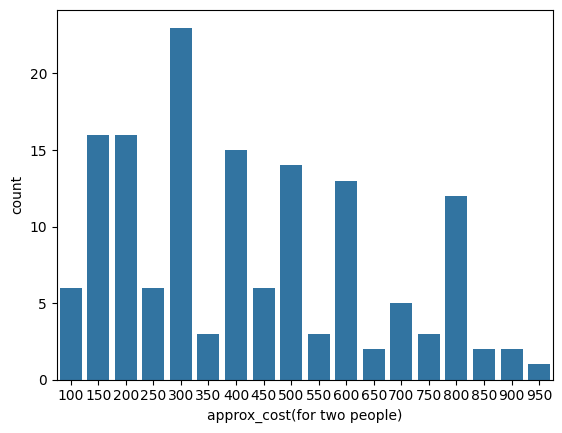

In [39]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Conclusion:
The majority of the couple's order cost is 300.
Both the graph and numeric values giving the same result.


### Qus5 -> which mode (online/offline) has received the maximum ratings ?

In [42]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

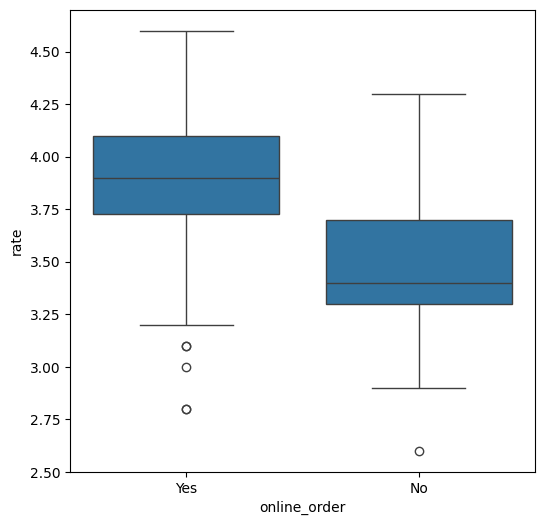

In [44]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order',y = 'rate',data = dataframe)

### conclusion :
Offline order receives lower ratings in comparison to online order.

### Qus6 -> Which type of restaurants received more offline orders,so that Zomato can provide customers some good offers ?

In [45]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


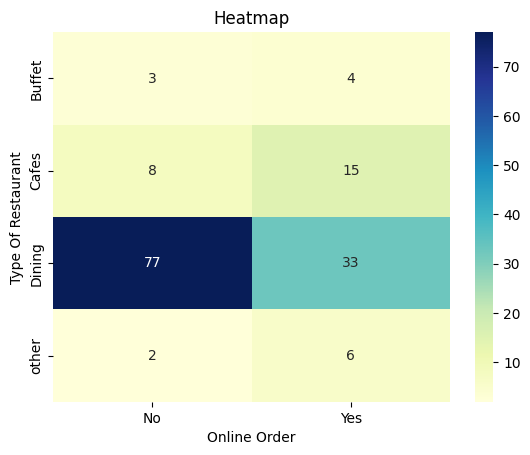

In [52]:
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type Of Restaurant")
plt.show()

### Conclusion:
Dining restaurants primarily accept more offline orders,wheras cafes primarily receive online orders. This suggest that client prefers orders in person at restaurants but online ordering at cafes.